In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_groq import ChatGroq
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
llm=ChatGroq(model_name="qwen/qwen3-32b")
result=llm.invoke("Hello")
result

AIMessage(content='<think>\nOkay, the user said "Hello". I need to respond appropriately. Since this is the first message, I should greet them back warmly. Let me keep it friendly and open-ended to encourage them to ask questions or share what\'s on their mind. I\'ll make sure the tone is welcoming and supportive. Let me also add an emoji to keep it approachable. Let me check if there\'s anything else I need to consider... No, that should cover it. Ready to reply.\n</think>\n\nHi there! 😊 How can I assist you today? Feel free to ask any questions or share what\'s on your mind!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 128, 'prompt_tokens': 9, 'total_tokens': 137, 'completion_time': 0.264658022, 'prompt_time': 0.000416284, 'queue_time': 0.056009875, 'total_time': 0.265074306}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='l

In [6]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [9]:
#langgraph urls
urls=[
    "https://www.langchain.com/langgraph",
    "https://github.com/langchain-ai/langgraph",
    "https://docs.langchain.com/oss/python/langgraph/overview"
]

In [11]:
docs = [WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://www.langchain.com/langgraph', 'title': 'LangGraph', 'description': 'Build controllable agents with LangGraph, our low-level agent orchestration framework', 'language': 'en'}, page_content='LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nProducts\n\nOpen Source FrameworksLangChainQuick start agents with any model providerLangGraphBuild custom agents with low-level controlDeep AgentsNewUse planning, memory, and sub-agents for complex, long-running tasksLangSmithObservabilityDebug and monitor in-depth tracesEvaluationIterate on prompts and modelsDeploymentShip and scale agents in productionResources\n\nLangChain AcademyBlogCustomer StoriesCommunityEventsChangelogGuidesTrust CenterDocsCompany\n\nAboutCareersPricingTalk to salesSign upBalance agent control with agencyGain control with LangGraph to design agents that reliably handle complex tasks.Start building\n\nIntroduction to LangGraphLearn the basics of LangGraph in this LangChain Academy

In [52]:
doc_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=1000, chunk_overlap=100)
doc_splits = text_splitter.split_documents(doc_list)

## Add all these in vectordb

vectorstore = FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings(),
)
retriever = vectorstore.as_retriever()

In [47]:
retriever.invoke("What is langgraph?")

[Document(id='bcb8a848-f14b-4e7d-baf7-0be16c4ebec0', metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content='LangGraph overview - Docs by LangChainSkip to main content🚀 Share how you\'re building agents for a chance to win LangChain swag!Docs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangGraph v1.0Release notesMigration guideGet startedInstallQuickstartLocal serverThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureTestLangSmith StudioAgent Chat UILangSmith DeploymentLangSmith ObservabilityLangGraph APIsGraph APIFunctional APIRuntimeOn this page InstallCore benefitsLangGraph ecosystemAcknowledgementsLangGraph overvi

In [115]:
from langchain_core.tools import Tool

retriever_tool = Tool(
    name="retriever_vector_db_blog",
    func=retriever.invoke,
    description="Search for information about langgraph."
)

In [116]:
retriever_tool

Tool(name='retriever_vector_db_blog', description='Search for information about langgraph.', func=<bound method BaseRetriever.invoke of VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001D4D9DD8B60>, search_kwargs={})>)

### Lanchain Blogs

In [117]:
## langchain urls
langchain_urls=[
    "https://www.langchain.com",
    "https://github.com/langchain-ai/langchain",
    "https://docs.langchain.com"
]
docs = [WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://www.langchain.com', 'title': 'LangChain', 'description': 'LangChain provides the engineering platform and open source frameworks developers use to build, test, and deploy reliable AI agents.', 'language': 'en'}, page_content="LangChain\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nProducts\n\nOpen Source FrameworksLangChainQuick start agents with any model providerLangGraphBuild custom agents with low-level controlDeep AgentsNewUse planning, memory, and sub-agents for complex, long-running tasksLangSmithObservabilityDebug and monitor in-depth tracesEvaluationIterate on prompts and modelsDeploymentShip and scale agents in productionResources\n\nLangChain AcademyBlogCustomer StoriesCommunityEventsChangelogGuidesTrust CenterDocsCompany\n\nAboutCareersPricingTalk to salesSign upEngineer reliable agentsShip agents to production with LangChain's comprehensive platform for agent engineering.Talk to salesSign up\n\nLangChain products power top engineeri

In [118]:
from langchain_core.tools import Tool

doc_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=1000, chunk_overlap=100)
doc_splits = text_splitter.split_documents(doc_list)

## Add all these in vectordb

vectorstorelangchain = FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings(),
)
retrieverlangchain = vectorstorelangchain.as_retriever()


retriever_tool_langchain = Tool(
    name="retriever_vector_langchain_blog",
    func=retrieverlangchain.invoke,
    description="Search for information about langchaih."
)

In [119]:
tools = [retriever_tool,retriever_tool_langchain]

### LangGraph WorkFlow

In [121]:

from typing  import Annotated, Sequence,Literal
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]


In [122]:
from langchain_groq import ChatGroq
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

llm=ChatGroq(model_name="qwen/qwen3-32b")
llm.invoke("What is the capital of India?")

AIMessage(content="<think>\nOkay, the user is asking for the capital of India. Let me start by recalling what I know about India. I know that India is a country in South Asia, a federal union with 28 states and 8 union territories. The capital is usually a city that holds the administrative center of the country.\n\nI remember that New Delhi is often mentioned as the capital. But wait, there's also Delhi. Delhii is a big city, right? So what's the difference between Delhi and New Delhi? I think Delhi is the national capital territory, and New Delhi is the actual city where the government is located. That makes sense because sometimes capitals are within larger metropolitan areas.\n\nLet me verify this. The National Capital Territory of Delhi is a union territory of India, and New Delhi is a city within that territory. So the capital is New Delhi, which is part of Delhi. This is because when the British were in India, they moved the capital from Calcutta to Delhi, and they built a new c

In [124]:
def agent(state):
    """
        Invokes the agent with the given state.

        Args:
            state (dict): The current state of the agent.

        Returns:
            dict: A dictionary containing the response from the agent.
        """
    print("---CHECK 2 REACHED AGENT running---")
        
    messages = state["messages"]
    model = ChatGroq(model_name="qwen/qwen3-32b")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    # of messages in the graph
    print("---CHECK 2 AGENT MESSAGE running---")
    return {"messages": [response]}

In [125]:
from typing import Annotated, Sequence,Literal
from typing_extensions import TypedDict
from langchain_classic import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [131]:
def grade_documents(state) -> Literal["generate","rewrite"]:
    """
        Determines whether the retrieved documents are relevant to the question.

        Args:
            state (dict): The current state of the agent. The retrieved documents
            are stored under the "documents" key in the state.

        Returns:
            str: A decesion for whether th documents are relevant or not
        """
    print("---CHECK RELEVANCE---")

    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score:str = Field(...,description="Final answer must be a binary choice of yes or no.")
        
    model = ChatGroq(model_name="qwen/qwen3-32b")
     
    llm_with_tools = model.with_structured_output(grade)
     
    prompt = PromptTemplate(
        template="""You are a grader assessing relavance of a retrived documents to a user question. \n
        Here is the retrieved document: {context}\n
        Here is the user question: {question} \n
        If the document contains keyword to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )
     
    # chain 
    chain = prompt | llm_with_tools
    
    messages = state["messages"]
    last_message = messages[-1]
    
    question = messages[0].content
    docs = last_message.content
    
    scored_result = chain.invoke({"context": docs, "question": question})
    
    score = scored_result.binary_score
    
    if score == "yes":
        print("---DECESION: DOCS RELEVANT---")
        return "generate"
    else:
        print("---DECESION: DOCS NOT RELEVANT---")
        print("Result: ", score)
        return "rewrite"
    
  
        

In [132]:
def generate(state):
    """
        Generate answer
        Args:
            state (messages): The current state
        Returns:
            state (messages): The updated state
    """
    print("---CHECK 3 REACHED GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]
    docs = last_message.content
    
    # Prompt
    prompt = hub.pull("rlm/rag-prompt")
    
    #llm
    llm = ChatGroq(model_name="qwen/qwen3-32b")
    
    #post-processing LLM
    
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    #chain
    rag_chain = (
        prompt
        | llm
        | StrOutputParser()
    )
    #run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [133]:
def rewrite(state):
    """
    Transform the query to produce a better question.
    Args:
        state(messages): The current state
    Return:
        dict: The updated state with re-phrased question
    
    """
    
    print("---Transform query---")
    messages = state["messages"]
    question = messages[0].content
    
    msg = [
        HumanMessage(
            content=f"""You are a rephraser. You are to rephrase the question to be a better question. \n
            Here is the original question: {question} \n
            Please rephrase the question to be a better question.
            """
        )
    ]
    
    #Grader
    model = ChatGroq(model_name="qwen/qwen3-32b")
    response = model.invoke(msg)
    return {"messages": [response]}

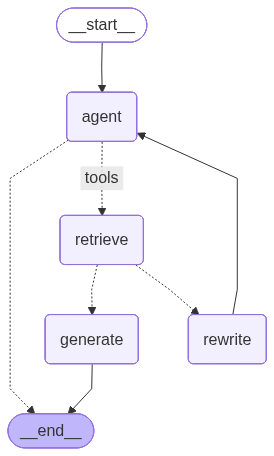

In [134]:
### State Graph

from langgraph.graph import StateGraph, END, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

#Define new graph
workflow = StateGraph(AgentState)

#define the node , we will cycle between
workflow.add_node("agent", agent) #agent
retrieve = ToolNode(
   [
       retriever_tool,
       retriever_tool_langchain
   ]
)
workflow.add_node("retrieve", retrieve) #retrival
workflow.add_node("rewrite", rewrite) #rewrite the question
workflow.add_node("generate", generate) # generating a respopnse after we know the document are relevant

# call agent to decide whether to retrive or not

workflow.add_edge(START, "agent")

#decide whether to retrive
workflow.add_conditional_edges(
    "agent",
    tools_condition,
    {
        "tools": "retrieve",
        END: END,
    },
)
# edges taken after the action node is called
workflow.add_conditional_edges(
    "retrieve",
    grade_documents,   
)

workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

#compile
graph=workflow.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))



In [135]:
graph.invoke({"messages":"what is langgraph"})

---CHECK 2 REACHED AGENT running---
---CHECK 2 AGENT MESSAGE running---
---CHECK RELEVANCE---
---DECESION: DOCS RELEVANT---
---CHECK 3 REACHED GENERATE---


{'messages': [HumanMessage(content='what is langgraph', additional_kwargs={}, response_metadata={}, id='7ca87386-2eed-4b0d-bdad-4e690342239f'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "what is langgraph". Let me see which tool I should use here. The available tools are retriever_vector_db_blog and retriever_vector_langchain_blog. The first one is for information about langgraph, and the second is for langchaih. Since the user is asking about langgraph, I should use the retriever_vector_db_blog function. The parameters require a __arg1 which is a string. I need to make sure to format the tool call correctly. The query should be the user\'s question. Let me structure the JSON with the function name and the arguments. Double-check the spelling of the function and parameters. Alright, that should do it.\n', 'tool_calls': [{'id': '656d7wcp3', 'function': {'arguments': '{"__arg1":"what is langgraph"}', 'name': 'retriever_vector_db_blog'}, 'ty

In [136]:
graph.invoke({"messages":"what is langchain"})

---CHECK 2 REACHED AGENT running---
---CHECK 2 AGENT MESSAGE running---
---CHECK RELEVANCE---
---DECESION: DOCS RELEVANT---
---CHECK 3 REACHED GENERATE---


{'messages': [HumanMessage(content='what is langchain', additional_kwargs={}, response_metadata={}, id='8e9fb87e-897b-4975-9547-450ef305e0b8'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "what is langchain". Let me see which tool to use here. The available tools are retriever_vector_db_blog and retriever_vector_langchain_blog. The descriptions say that retriever_vector_langchain_blog is for searching information about langchaih. Wait, that\'s probably a typo. It should be LangChain. So the correct function to use here is retriever_vector_langchain_blog. The parameter required is __arg1, which I need to set to "langchain" to get the information. I\'ll make sure to call that function with the right argument.\n', 'tool_calls': [{'id': 'sx0ypkk4t', 'function': {'arguments': '{"__arg1":"langchain"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 154, 'prompt_tokens': 2

In [137]:
graph.invoke({"messages":"what is Machine Learning"})

---CHECK 2 REACHED AGENT running---
---CHECK 2 AGENT MESSAGE running---


{'messages': [HumanMessage(content='what is Machine Learning', additional_kwargs={}, response_metadata={}, id='ea5cb852-00f9-4f13-b530-0947d3c55bdb'),
  AIMessage(content="Machine Learning (ML) is a subset of Artificial Intelligence (AI) that focuses on developing algorithms and statistical models that enable computers to perform tasks without explicit instructions. Instead, these systems learn patterns and make decisions based on data. Key types include:\n\n1. **Supervised Learning**: Uses labeled data to train models (e.g., predicting house prices based on historical data).\n2. **Unsupervised Learning**: Finds hidden patterns in unlabeled data (e.g., clustering customers by behavior).\n3. **Reinforcement Learning**: Learns by interacting with an environment through trial and error, guided by rewards/penalties.\n\nML is widely applied in areas like image recognition, natural language processing, recommendation systems, and more. Let me know if you'd like deeper insights!", additional_